#1 - Introduction

> The introductory chapter should be filled with identity, the query you have made on Google Cloud Platform!, and the goal to be achieved.

Name : Hillidatul Ilmi

Batch : FTDS-012

Dataset URL : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Dataset : Pima Indians Diabetes Database. This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases. Specifically, all patients in this dataset were women aged at least 21 years of Pima Indian descent.

Objective : The purpose of the data set is to predict diagnostically whether a patient has diabetes (Class 1) or does not represent a person with diabetes (grade) 0, based on certain diagnostic measures as features included in the data set.
The Pima Indians Diabetes dataset consists of several medical parameters and one target parameter (outcome) of binary values ​​0 and 1. This dataset is mainly for predicting gender. Female at least 21 years old of Pima Indian descent.

The dataset consists of several medical feature variables and one target variable, Outcome. Feature variables include Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age.
Based on this, I will analyze the diagnostics of diabetic hereditary pima indians with six methods, namely Logistic Regression, SVM, Decision Tree, Random Forest and KNN.

#2 - Import Libraries

> The first cell in the notebook must contain and contain only all the libraries used in the project.

Import libraries are used to import the contents of modules and are used to support some syntax commands to be executed. In the milstone 2 machine learning process, the following libraries will be used:

In [ ]:
# Define Libraries

# library calling dataset and data
import pandas as pd
import numpy as np 

# library data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

# library data preprocessing
!pip install feature-engine
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# library model algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

# library model evaluation algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


the library that I will use to work on milstone 2 is from the numpy library, pandas, matplotlib, seaborn and several various sklearn modules for use in supporting the running of a model.

#3 - Data Loading

> This section contains the data preparation process before further data exploration is carried out. The Data Loading process can be in the form of giving a new name for each column, checking the size of the dataset, etc.


In [ ]:
# Viewing or processing a CSV dataset from a drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Displays data to be used in analysis or loading from data sets
data = pd.read_csv('https://raw.githubusercontent.com/HillidatulIlmi/Dataset/main/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The Indian pima hereditary diabetes diagnostic dataset consists of 9 columns with 8 feature parameters, 1 target parameter with unique identification 768 observations having 268 positive for diabetes (1) and 500 negative for diabetes (0). The nine columns are as follows:
- Pregnancies : Pregnancy is one of the conditions used to describe the period when the fetus is developing in the womb. In determining the diagnosis of diabetes, the patient is seen by the history of how many times he has had pregnancy.
- Glucose: The oral glucose tolerance test is an examination that measures the body's ability to absorb sugar (glucose) after the patient consumes a certain amount of sugar. The results of this test can help doctors diagnose diabetes, including gestational diabetes that occurs in pregnant women.
Blood Pressure: Blood pressure is a measure of the force used by the heart to pump blood throughout the body. See the results of the measurement of the systolic and diastolic blood pressure numbers on the blood pressure gauge per (mmHg). Normal blood pressure minimizes the patient's diabetes, and vice versa.
- Skin Thickness: The thickness of the deep triceps skin fold (mm). Diabetics need a long time to control blood sugar well, poor blood supply to the skin can cause changes in the collagen and fat underneath. The overlying skin becomes thin and red.
- Insulin: Insulin injections are used before meals or at night before going to bed to keep blood sugar levels stable. For each type of 2-hour serum insulin injection (mu U/ml), the patient's reaction to sugar levels was seen.
- BMI: Measurement to determine healthy and unhealthy weight groups. The accuracy between the patient's weight (kg) and the patient's height (m2).
- Diabetes Pedigree Function: History of diabetes in yourself and your closest family (who have a genetic relationship with the patient).
- Age: The age of the patient (years).
- Outcome: Class 1 indicates people with diabetes and class 0 does not have diabetes or live a healthy life.

In [ ]:
# Duplicate Data
data_copy = data.copy()

Duplicate (duplicate) the dataset, if there is a change in the column or attribute can still be compared with the original dataset. The function of multiplication so that the original data can still be used if there are some changes in the contents of the dataset.

In [ ]:
# Check the size of the dataset to be used
print(data.shape)

(768, 9)


Based on the command .shape that the size of the diabetic diagnostic dataset of pima indians consists of 768 rows and 9 columns.

In [ ]:
# View the column names from the diabetic diagnostic dataset table of pima indians
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The column names have been described previously, these columns have different size values for each patient.

In [ ]:
# Checking the dataset information from the diabetic diagnostic table of pima indians
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Based on the data.info() command, the Pima Indians diabetic diagnostic table has about 9 columns, where all columns are identified as integer type or numeric columns, where 7 columns are integer type and the other 2 columns are float type.

#4 - Exploratory Data Analysis (EDA)

> This section contains data exploration on the dataset above by using queries, grouping, simple visualization, and so on.

Quoted from medium.com, Exploratory Data Analysis (EDA) is part of the data science process. EDA is very important before performing feature engineering and modeling because at this stage we must understand the data first. For EDA I display several visualizations in the form of feature or target information in the form of histograms, bar charts, pie charts, distribution charts, queries and others. The following is a visualization of the dataset from the diabetic diagnostic table of pima indians:

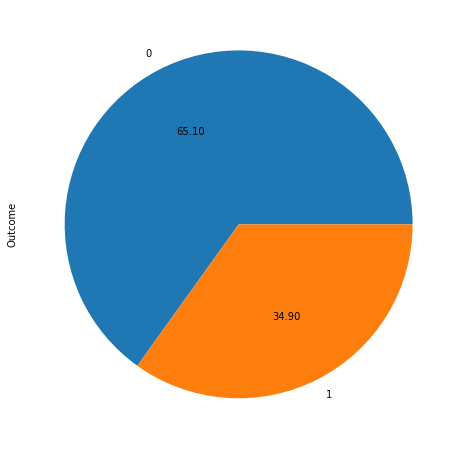

In [ ]:
# Pie chart visualization of Indian Pima hereditary diabetes diagnostic targets
# See the class of diabetic pima indians
data['Outcome'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Description of Outcome Feature Visualization:

Pie chart visualization shows a class comparison of diabetic diagnostics from patients of Indian origin. Based on the visualization it shows that class 0 is more dominant by 65.1% which means, the patients do not suffer from diabetes or live a healthy life where the blood sugar level of the patient's body is normal. While visualization class 1 is 34.9% less, which means that the patients have diabetes where the blood sugar level of the patient's body is very high. If the number of healthy patients is greater than the number of patients with diabetes, the ratio is very different, namely 6: 4. Based on the diagnostic target of diabetes, in this study I will not perform feature imbalance to equalize the comparison between the target classes, because in the case of health, the patient is always expected live healthy and not affected by any disease, in this case class 0 with healthy living patients is more dominant so it is hoped that all patients are also in good health, and want to analyze the original data without changing the target class.

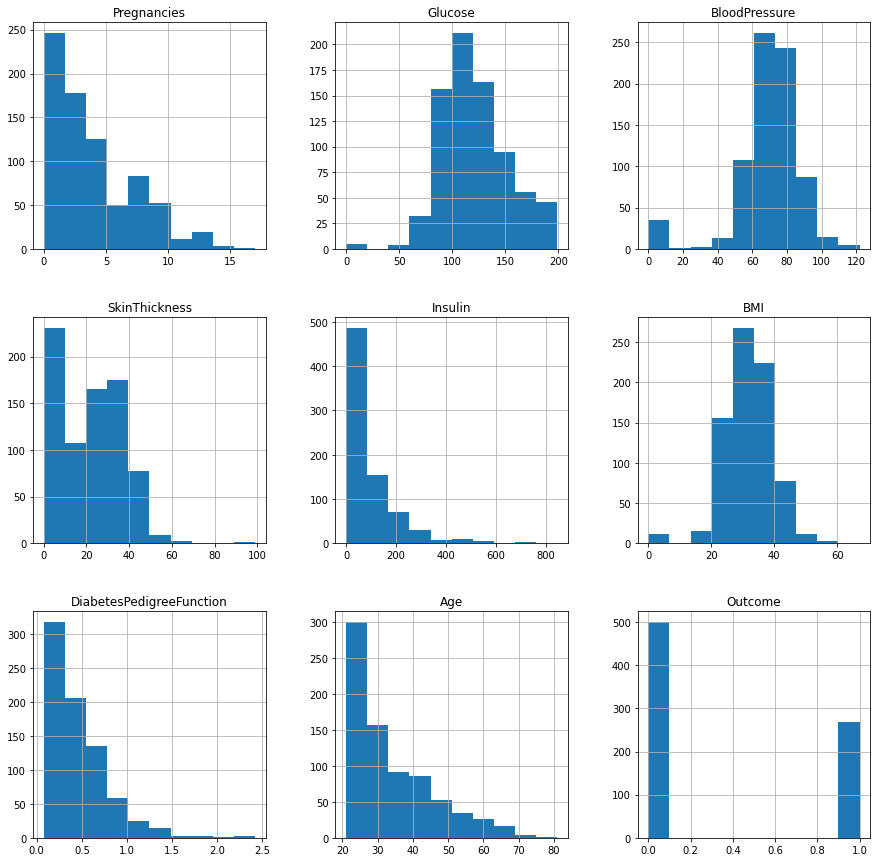

In [ ]:
# Histogram of features affecting diabetes diagnostics
data.hist(figsize=(15,15))
plt.show()

Based on the results of visualization through the histogram obtained some information as follows:
1. Pregnancies feature, where the patient is seen a history of how many times he has had pregnancy. Diagnosed patients with diabetes of pima indian descent are more women who are not pregnant, as seen from the high data gathered at zero. Through the histogram pattern, on average, Pima Indians women experience the most dominant pregnancy only up to five times, but some or some also experience 7 pregnancies.
2. Glucose feature, where the patient's body's ability to absorb sugar. Diagnosed patients with diabetes of pima indians on average have the most glucose levels around 100-120 mg/dL, where there are still some patients whose normal glucose levels are in accordance with the general standard, which is between 80-120 mg/dL. Through the histogram, there are still some patients who have low glucose levels from the standard limit of 80 mg/dL and there are also some patients who have high glucose levels from the standard limit of 20 mg/dL.
3. Blood Pressure feature, where the patient's blood pressure is seen from the measurement of his heart in pumping blood throughout the body. Diagnosed patients with pima indians have an average blood pressure of 60-70 mmHg at most. Normal blood pressure has a value of 120/80 mmHg, in this case the patient of pima indians has blood pressure that is not according to the standard it should be, where the most dominant blood pressure is around 60-70 mgHg less appropriate at the value of 80 mgHg. However, for the second order, patients with pima indians still have a dominant blood pressure that is quite normal, which is between 70-80 mgHg. Through the histogram, there are still some patients who have lower blood pressure than the standard limit of 80 mgHg and there are also some patients who have high blood pressure from the standard limit of 80mgHg.
4. Skin Thickness, where the patient has a level of thickness in the triceps skin fold (mm). Diagnosed patients with pima indians have a dominant mean skinfold fat thickness of 0-1 mm. The standard value for the normal triceps skinfold thickness is 9.9mm-16.5mm. However, most of the diabetic patients of pima indian descent also have skinfold fat thickness between 30-40 mm. Through the histogram there are still some patients who have skinfold skinfold thickness spread from the standard limit of 9.9mm - 16.5mm, most of them have inappropriate skin thickness.
5. Insulin, where the patient receives insulin injections to keep blood sugar levels stable. Diagnosed patients with pima indians have a dominant mean insulin level after 2-hour serum administration of 0-100 mIU/L. The normal standard value for insulin levels after 2-hour serum administration is 16-166 mIU/L. Through the histogram there are many patients who have a general reaction level of the amount of insulin after 2-hour serum use, although there are still patients who are outside the general range of reactions to insulin use.
6. BMI, where patients are measured to determine healthy and unhealthy weight groups. Diagnosed patients with pima indians had a dominant mean BMI of 30. The normal standard values ​​for juBMI were 18.5 and 24.9, respectively. Through the histogram, there are many patients who have BMI values ​​almost according to the standard ideal, although there are still some values ​​that do not match.
7. Diabetes Pedigree Function, where the patient has a history of diabetes caused by having a genetic relationship with other diabetic patients. Through the histogram, there are many patients who have a chance of getting hereditary diabetes by 0.00% - 0.05%, the possibility of only a few getting the disease based on heredity.
8. Age, is the age of diabetic patients of Pima Indian descent. Through histograms of the age range from 20 to 80 years, young ages between 20-30 are more dominant for the pima indians breeds.

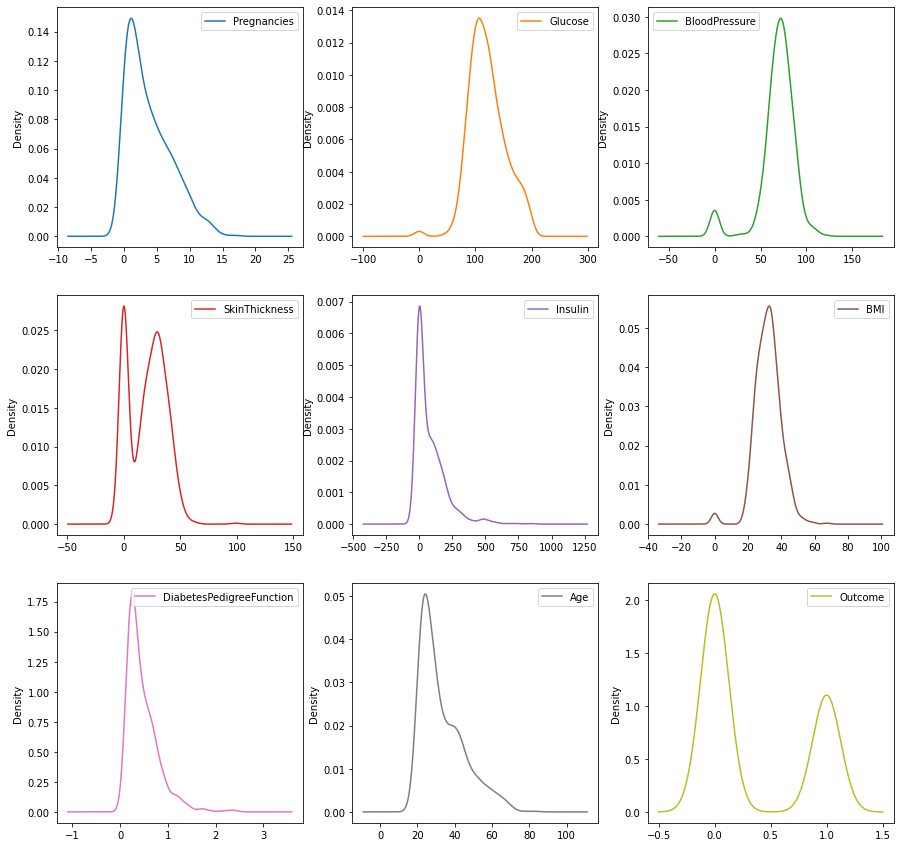

In [ ]:
# Density plots of all diabetic diabetic columns of Indians
data.plot(kind= 'density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))
plt.show()

Based on the results of the visualization of the distribution of data distribution for each column, the following information is obtained:

1. The features of Pregnancies, SkinThickness, Insulin, DiabetesPedigree Function and age, form a density distribution that is skewed to the left, which indicates that the scatter values of these features converge on the left tail of the overall distribution of the data set.
2. Glucose feature, forming a density distribution that is skewed to the right, which indicates that the scatter values of these features converge on the right tail of the overall distribution of the data set.
2. The BloodPressure and BMI features, form a normal skewed distribution, where the mean and mean values converge at one midpoint of the entire data set, forming a perfect bell image.

In [ ]:
# View the value of the skewness of the distribution of the diabetic diagnostic dataset of pima indians
skew_data = abs(data.corr()['Outcome']).sort_values()[:-1]
fig = px.bar(skew_data, orientation='h', color_discrete_sequence =['#FF6692']*len(skew_data))
fig.update_layout(showlegend=False)
fig.show()

Based on the bar chart visualization above, the following information is obtained:

The skewness value of the glucose feature is the highest compared to other features, namely 0.466, where this value is in accordance with the standard range of skwness values of -2 to 2. The skewness value of the BMI feature is 0.292, the age feature is 0.238, the pregnancies feature is 0.221, the diabetes pedigree function feature is 0.173, insulin feature 0.130, skin thickness feature 0.074, where this value is in accordance with the standard range of skwness values of -2 to 2. While the skewness value of the blood pressure feature is the lowest compared to other features, namely 0.065, where this value is in accordance with the standard range of values. skwness -2 to 2. So that all 8 features have data that are normally distributed

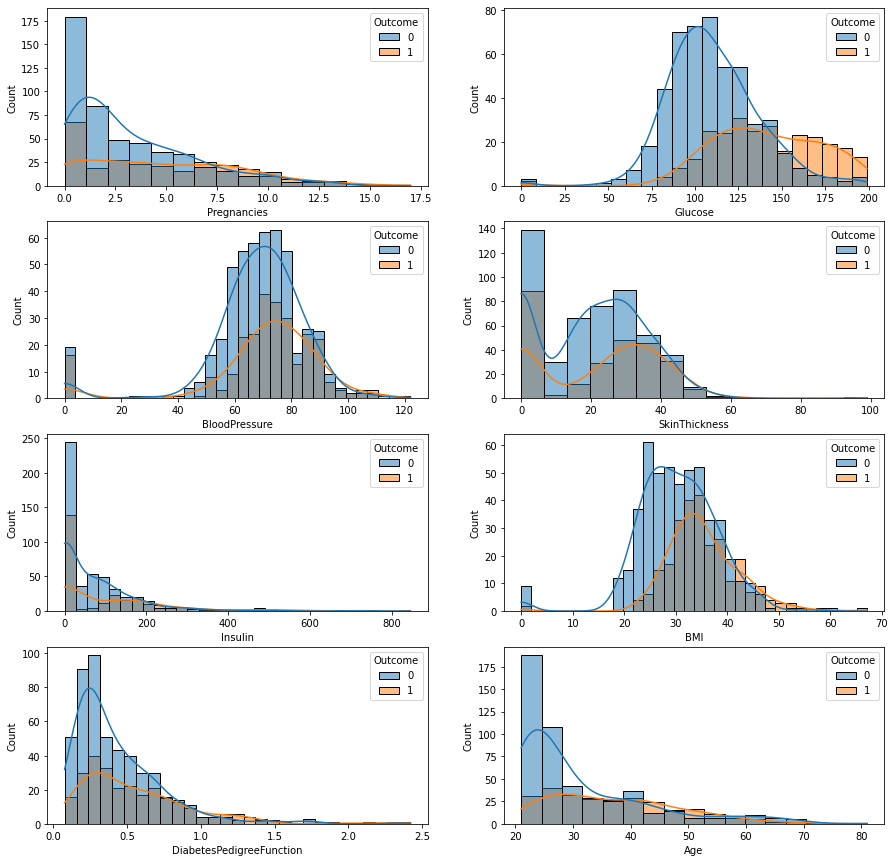

In [ ]:
# Visualization of histograms for features in the form of numeric data from the default credit card database table
colors = sns.color_palette('dark')
fig,axs=plt.subplots(4,2, figsize=(15,15))
sns.histplot(data=data, x='Pregnancies', kde=True, hue="Outcome", ax=axs[0,0])
sns.histplot(data=data, x='Glucose', kde=True, hue="Outcome", ax=axs[0,1])
sns.histplot(data=data, x='BloodPressure', kde=True, hue="Outcome", ax=axs[1,0])
sns.histplot(data=data, x='SkinThickness', kde=True, hue="Outcome", ax=axs[1,1])
sns.histplot(data=data, x='Insulin', kde=True, hue="Outcome", ax=axs[2,0])
sns.histplot(data=data, x='BMI', kde=True, hue="Outcome", ax=axs[2,1])
sns.histplot(data=data, x='DiabetesPedigreeFunction', kde=True, hue="Outcome", ax=axs[3,0])
sns.histplot(data=data, x='Age', kde=True, hue="Outcome", ax=axs[3,1])
plt.show()

- Pregnancies: Pregnancy is one of the conditions used to describe the period when the fetus is developing in the womb. In determining the diagnosis of diabetes, the patient is seen by the history of how many times he has had pregnancy.
- Glucose: An oral glucose tolerance test is an examination that measures the body's ability to absorb sugar (glucose) after the patient consumes a certain amount of sugar. The results of this test can help doctors diagnose diabetes, including gestational diabetes that occurs in pregnant women.
- Blood Pressure: Blood pressure is a measure of the force the heart uses to pump blood throughout the body. See the results of the measurement of the systolic and diastolic blood pressure numbers on the blood pressure gauge per (mmHg). Normal blood pressure minimizes the patient's diabetes, and vice versa.
- Skin Thickness: The thickness of the deep triceps skin fold (mm). Diabetics need a long time to control blood sugar well, poor blood supply to the skin can cause changes in the collagen and fat underneath. The overlying skin becomes thin and red.
- Insulin: Insulin injections are used before meals or at night before going to bed to keep blood sugar levels stable. For each type of 2-hour serum insulin injection (mu U/ml), the patient's reaction to sugar levels was seen.
- BMI: A measurement to determine healthy and unhealthy weight groups. The accuracy between the patient's weight (kg) and the patient's height (m2).
- Diabetes Pedigree Function: History of diabetes in yourself and your closest family (who have a genetic relationship with the patient).
- Age : Age of the patient (years).
- Outcome: Class 1 indicates people with diabetes and class 0 does not have diabetes or live a healthy life.

In [ ]:
data.describe()[1:].T.style.background_gradient(cmap='Greens_r')

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


Descriptive Statistical Interpretation Diagnostic dataset of Indian pima hereditary diabetes:

1. Pregnancies: The average Pima Indians patient had 4 pregnancies with a mean (Q2) of 3 times, the mean and the mean were close to each other, this indicates that the percentage of occurrence of a pregnancy is in a normal distribution. The number of pregnancies at least/lowest is 0 times or not at all and the most/highest is 17 times. The occurrence of pregnancies with Pima Indians has a standard deviation of 3 times, which means that the distribution of the sample data is far from the average value of the sample itself.
2. Glucose: On average, patients of pima indians have the body's ability to absorb sugar of 121 mg/dL with a mean value (Q2) of 117 mg/dL, the average value and the mean value are close to each other, this indicates that blood glucose levels are close to each other. glucose was in a normal distribution. The body's ability to absorb sugar is at least/lowest 0 mg/dL or not at all and at most/highest is 199 mg/dL. The body's ability to absorb sugar from pima indians has a standard deviation of 32 mg/dL, which means that the distribution of the sample data is far from the average value of the sample itself.
3. Blood Pressure: On average, the Pima Indians patient has a blood pressure of 69 mmHg with a median value (Q2) of 72 mmHg, the average value and the median value are close to each other, this indicates that the blood pressure data is in a normal distribution. Blood pressure in pumping blood throughout the body is at least/lowest 0 mmHg or not at all and at most/highest is 122 mmHg. Blood pressure in pumping blood throughout the body of Pima Indians has a standard deviation of 19 mmHg, which means that the distribution of the data sample is far from the average value of the sample itself.
4. SkinThickness: The average patient of pima indians has a triceps skin fold thickness of 20 mm with a mean (Q2) value of 23 mm, the mean and mean values ​​are close to each other, this indicates that the blood pressure data are in a normal distribution. . The triceps skinfold thickness was the least/lowest was 0 mm or not at all and the highest/highest was 99 mm. The triceps skinfold thickness of pima indians has a standard deviation of 16 mm, which means that the distribution of the sample data is far from the average value of the sample itself.
5. Insulin: On average, pima indians patients received a 2-hour serum insulin injection of 80 muU/ml with a mean (Q2) value of 30 muU/ml, the mean and mean values ​​are close to each other, this indicates that the data blood pressure was in a normal distribution. The minimum/lowest 2-Hour serum insulin injection was 0 muU/ml or none and the maximum/highest was 846 muU/ml. The 2-hour serum insulin injection of pima indians had a standard deviation of 115 muU/ml, which means that the distribution of the sample data is far from the average value of the sample itself.
6. BMI: The average of patients of pima indian descent regarding the measurement to determine the healthy weight group is 32 with a median value (Q2) of 32, the average value and the mean value are close to each other, this indicates that the blood pressure data is in a distribution normal. The measurement to determine the healthy weight group at least/lowest is 0 or not at all and the most/highest is 67. The measurement to determine the healthy weight group of pima indians has a standard deviation value of 8, which means that the distribution of the data sample is far from average. the average value of the sample itself.
7. Diabetes Pedigree Function: The average of patients of Indian descent with genetically inherited diabetes is 0.47 with a mean (Q2) value of 0.37, the mean and mean values ​​are close to each other, this indicates that the blood pressure data are in a normal distribution. . The patient had a history of diabetes which resulted from having a genetic relationship at least/the lowest was 0.07 or not at all and the highest/highest was 2.42. The patient has a history of diabetes which results from having a genetic relationship with Pima Indians and has a standard deviation of 0.33, which means that the distribution of the sample data is far from the average value of the sample itself.
8. Age: The average age of the pima indians patient is 33 with a mean (Q2) of 29, the mean and the mean are close to each other, this indicates that the blood pressure data are in a normal distribution. The age of the patient at least/lowest is 21 or not at all and the most/highest is 81. The age of the patient of pima indians descent has a standard deviation of 12, which means that the distribution of the sample data is far from the average value of the sample itself.


Sumber referensi visualisasi EDA : [teks link](https://www.kaggle.com/code/sidart101/pima-indians-diabetes-eda-prediction)

#5 - Data Preprocessing

> This section contains the process of preparing data for the model training process, such as dividing the data into train-dev-test, data transformation (normalization, encoding, etc.), and other necessary processes.

## 5a - Data Inference

Quoted from aws.amazon.com, Inference is the process of making predictions using a trained model. Inference model is data that is not available in the dataset, if the searched data does not exist, then new data is entered. So the inference model is new data that is not in the data set. Data inference uses existing datasets.

The dataset is divided into two, namely inference set and non inference set (Train set & Test set)

In [ ]:
# Get Data for Model Inference

# Using pandas sample by calling 10 random data and random_state is used so that the selected random state remains the same
# It is assumed that there are 10 income groups that are not in the diabetic diagnostic dataset of Indian Pima descent
datainfernce = data.sample(10, random_state=10) 
datainfernce 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
568,4,154,72,29,126,31.3,0.338,37,0
620,2,112,86,42,160,38.4,0.246,28,0
456,1,135,54,0,0,26.7,0.687,62,0
197,3,107,62,13,48,22.9,0.678,23,1
714,3,102,74,0,0,29.5,0.121,32,0
27,1,97,66,15,140,23.2,0.487,22,0
277,0,104,64,23,116,27.8,0.454,23,0
64,7,114,66,0,0,32.8,0.258,42,1
720,4,83,86,19,0,29.3,0.317,34,0
475,0,137,84,27,0,27.3,0.231,59,0


From a collection of information on diabetes diagnostic datasets of pima indians, there are 10 data that are suspected not to be included in the dataset or but contained in the data inference section.

In [ ]:
# Remove Inference Set from Pima Indians diabetic diagnostic dataset

data_train_test = data.drop(datainfernce.index)
data_train_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

When not separating the inference data from that dataset, the initial dataset for diabetic pima indians diabetics had 768 rows and then removing/separating the inference data from the diabetic diabetic diabetic indians diagnostic dataset changed to 758 rows.

In [ ]:
# Reset Index
# In order to avoid unwanted occurrences, the data is reset its index for sequencing

data_train_test.reset_index(drop=True, inplace=True)
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,154,72,29,126,31.3,0.338,37,0
1,2,112,86,42,160,38.4,0.246,28,0
2,1,135,54,0,0,26.7,0.687,62,0
3,3,107,62,13,48,22.9,0.678,23,1
4,3,102,74,0,0,29.5,0.121,32,0
5,1,97,66,15,140,23.2,0.487,22,0
6,0,104,64,23,116,27.8,0.454,23,0
7,7,114,66,0,0,32.8,0.258,42,1
8,4,83,86,19,0,29.3,0.317,34,0
9,0,137,84,27,0,27.3,0.231,59,0


In the inference data section, the index is not sorted because it adjusts the row location of the data that is not included in the diabetic diagnostic dataset of Pima Indians, but after resetting the index, the index number is arranged. Restart the index, so that when it is run down or the process is complete, if there is an error in the results, it is certain that it is not because the index is messy or irregular.

##5b. - Splitting Datasets

Splitting Data is splitting to make X as a feature and Y as a target into Train/Test. Train/test split as a method that can be used to evaluate the performance of machine learning models.

In [ ]:
# Separation of `X` (Feature) and `y` (Target)

# Remove column axis=1 Outcome, to be included and divided into train/test
X = data_train_test.drop('Outcome', axis=1) 
# Create a variable y for the target outcome column only
y = data_train_test['Outcome']

In [ ]:
# Separate between Train-Set and Test-Set

# Entering x and y values, test_size means split 80% for train, and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (606, 8)
Test Size :  (152, 8)


The process of deleting the target outcome column is carried out to be transferred as a training set and testing set, from the diabetic diagnostic data of pima indians descent that has been transferred and then the tetrain_test_split process will be carried out by making 80% of the income group go to X_tarin and 20% go to y_train. X_train uses 606(80%) of 758 rows and y_train uses 152 (20% remaining) of 758 rows.

## 5c - Feature Selection

Quoted from trivusi.web.id, Feature selection is a preprocessing technique by reducing the number of irrelevant features to determine the target class.

Feature selection can use a heat map, looking for the correlation value between the feature column and the target column as high as possible or as low as possible. Looking for a correlation that is close to 1 if the value is zero, it can be dropped because there is no correlation between the feature column and the target column. Desired targets must have a correlation.

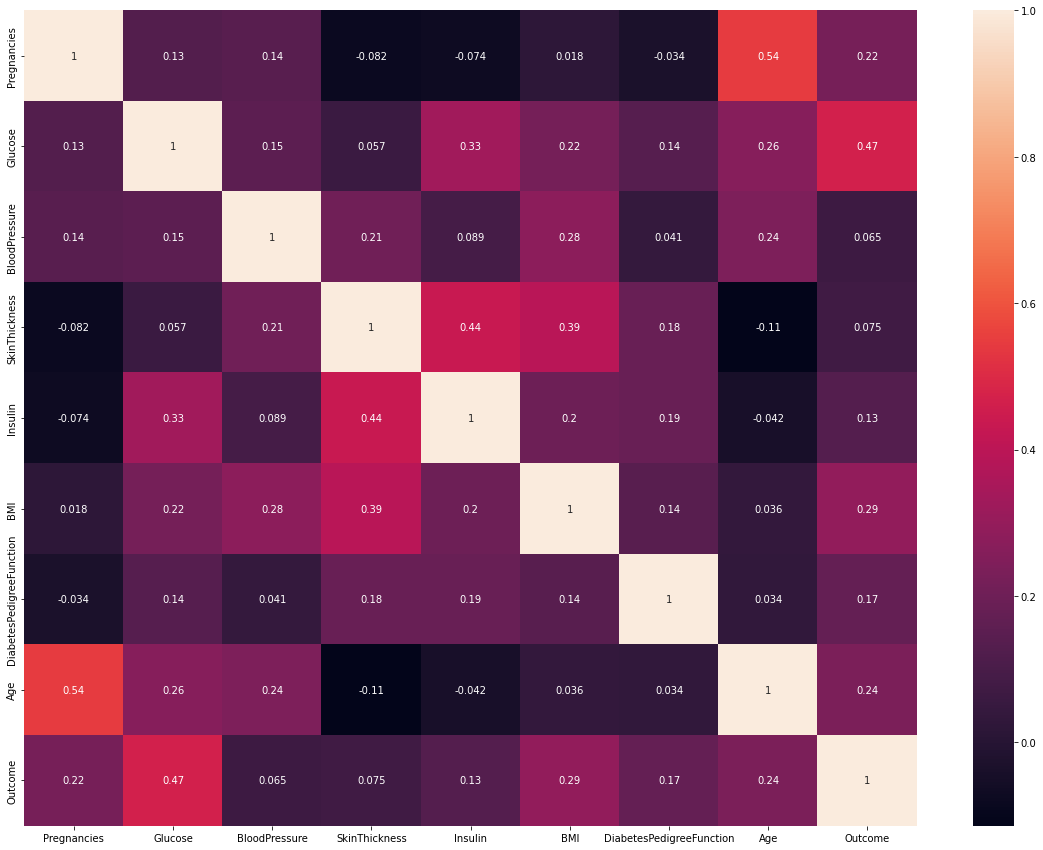

In [ ]:
# See the Correlation between Features and targets
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

Based on the correlation value of the Outcome target with 8 features that are thought to influence, that Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age have a positive correlation value. But to be more convincing, the feature importances process is carried out to see the highest feature score in influencing the Outcome target.

In [ ]:
# Feature selection for features that will be used or suspected to affect the target
# Create a classification for n estimators of some features
FeaturesSelection = RandomForestClassifier(n_estimators=100, random_state=0)
FeaturesSelection.fit(X_train, y_train)

# View the score of the training results for each feature
Features_Score = pd.Series(FeaturesSelection.feature_importances_, index=X_train.columns).sort_values(ascending=False)
Features_Score

Glucose                     0.252155
BMI                         0.163411
Age                         0.126206
DiabetesPedigreeFunction    0.122914
BloodPressure               0.099374
Pregnancies                 0.086534
SkinThickness               0.076552
Insulin                     0.072852
dtype: float64

The value of the feature score that is suspected of influencing the default payment produces a value from the largest to the highest. Based on the score, I chose all the features, namely Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age. Because I want to see the results of the analysis of each feature in influencing the patient's decision to have diabetes or live a healthy life.

## 5d - Handling Missing Value

Quoted from file.upi.edu.com, Missing value is information that is not available for an object (case). Missing value occurs because information for something about the object is not provided, is difficult to find, or simply does not exist. In this process, we will check the missing value data with .info() first:

In [ ]:
# Check Missing Values on X_train
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
# Check Missing Values on X_test
X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
# Check Missing Values on y_train
y_train.isnull().sum()

0

In [ ]:
# Check Missing Values on y_test
y_test.isnull().sum()

0

After handling the missing value, the X_train, X_test, y_train and y_test variables indicate that there is no missing value, which means it is clean from Nan data. Next will be handling outliers.

## 5e - Handling Outliers

Quoted from statistics.com, Outlier Data is also known as extreme value outlier data. What is meant by extreme values in observations are values that are far or completely different from most of the other values in the group.

To deal with outlier values, I chose the Censoring method. Censoring or capping, serves to limit the distribution of the maximum or minimum on an arbitrary value. Rescale to fit into the boxplot. I did not choose the Trimming or deletion method, so that the dimensions of the metric size remain the same and the amount of data is still maintained.

In [ ]:
# Function to create histograms and boxplots.
# This function takes the census_adult_income dataframe and the desired variable as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

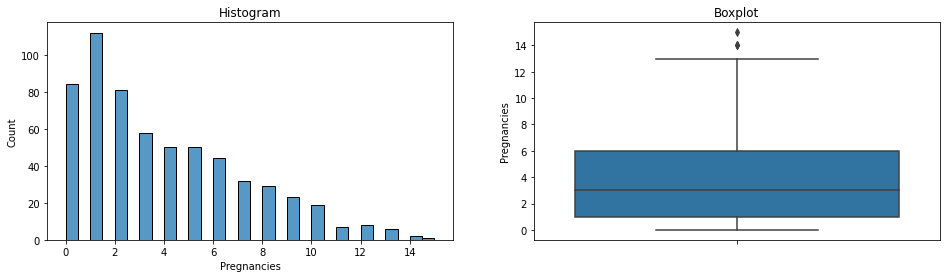


Skewness Value Pregnancies :  0.8706557724846876


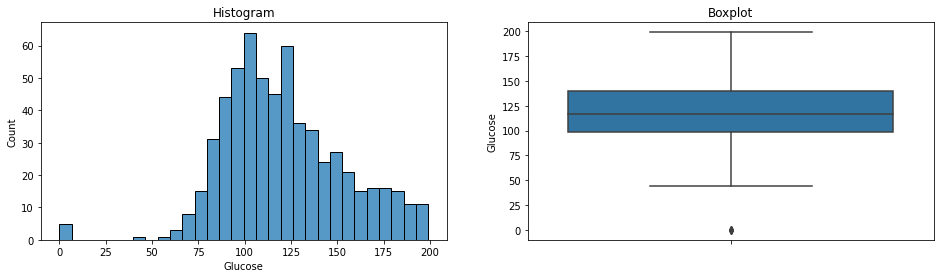


Skewness Value Glucose :  0.10324858873112074


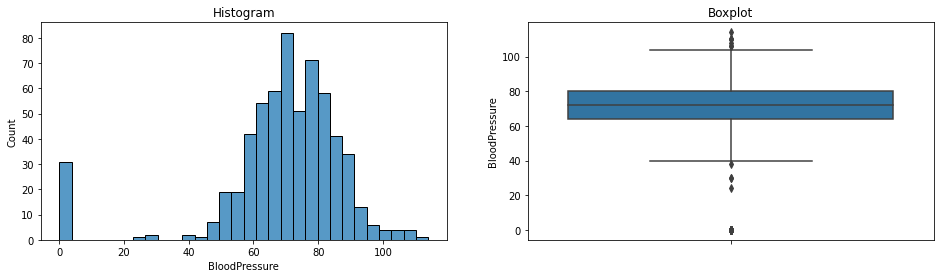


Skewness Value BloodPressure :  -1.8954651098937167


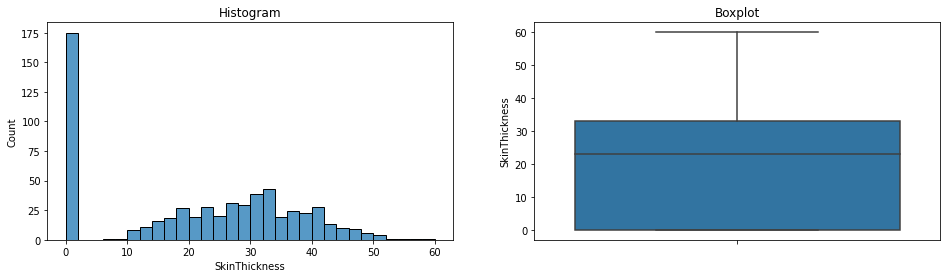


Skewness Value SkinThickness :  -0.10356118878556303


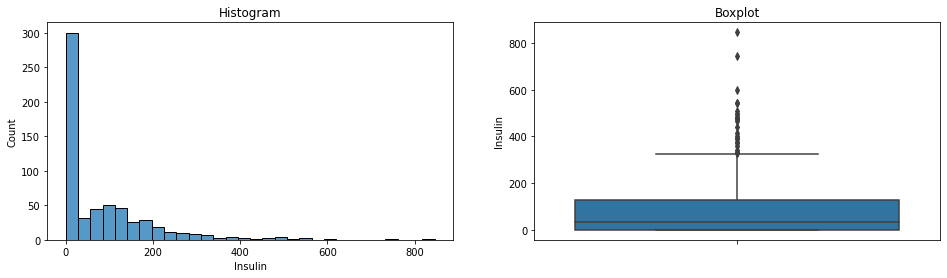


Skewness Value Insulin :  2.1776365675083924


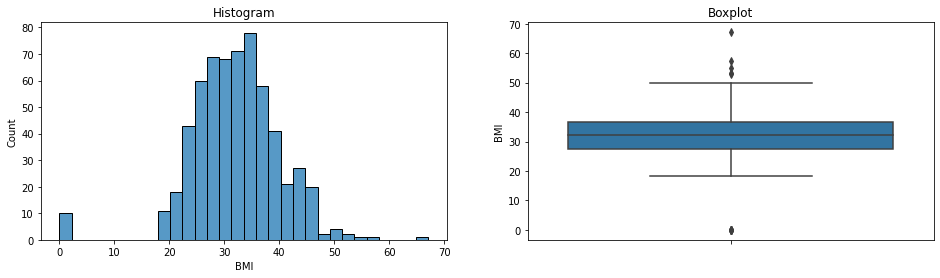


Skewness Value BMI :  -0.544571966001299


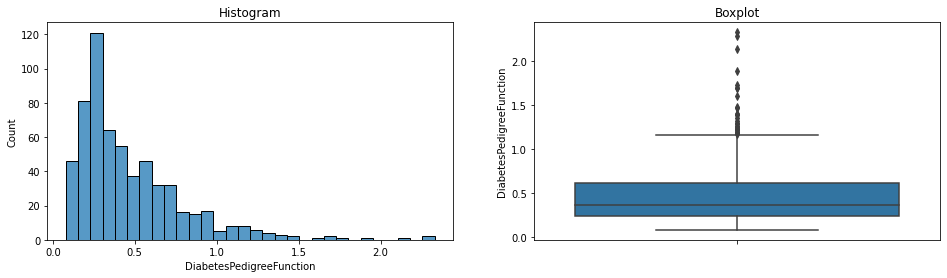


Skewness Value DiabetesPedigreeFunction :  1.8628209908460736


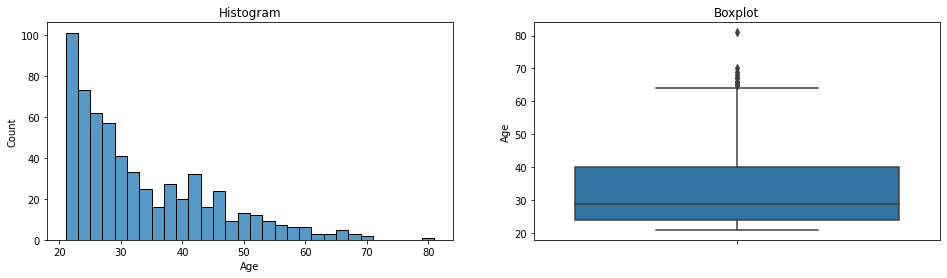


Skewness Value Age :  1.1381859495516997


In [ ]:
# Check distribution of features and outliers using Boxplot

diagnostic_plots(X_train, 'Pregnancies')
print('\nSkewness Value Pregnancies : ', X_train['Pregnancies'].skew())

diagnostic_plots(X_train, 'Glucose')
print('\nSkewness Value Glucose : ', X_train['Glucose'].skew())

diagnostic_plots(X_train, 'BloodPressure')
print('\nSkewness Value BloodPressure : ', X_train['BloodPressure'].skew())

diagnostic_plots(X_train, 'SkinThickness')
print('\nSkewness Value SkinThickness : ', X_train['SkinThickness'].skew())

diagnostic_plots(X_train, 'Insulin')
print('\nSkewness Value Insulin : ', X_train['Insulin'].skew())


diagnostic_plots(X_train, 'BMI')
print('\nSkewness Value BMI : ', X_train['BMI'].skew())

diagnostic_plots(X_train, 'DiabetesPedigreeFunction')
print('\nSkewness Value DiabetesPedigreeFunction : ', X_train['DiabetesPedigreeFunction'].skew())

diagnostic_plots(X_train, 'Age')
print('\nSkewness Value Age : ', X_train['Age'].skew())

It is said to be normally distributed when the value of the skewness ratio is in the range of -2 to 2. All eight features are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age, all data are normally distributed because they have skewness values according to the standard. The boxplot visualization of Pregnancies, Insulin, BMI, Diabetes Pedigree Function and Age features has outliers in the upper boxplot/top boxplot. The boxplot visualization of the Glucose feature has outliers at the bottom of the boxplot/bottom of the boxplot. The boxplot visualization of the BloodPressure and BMI features has outliers in the upper boxplot and lower boxplot/top and bottom of the boxplot. Therefore, the IQR value will be searched first to equalize the range of values to enter the boxplot. And make the data to be normally distributed.

In [ ]:
# Calculate/determine the IQR value for data that has outliers
X_train_ = Winsorizer(capping_method='iqr', # select iqr for IQR rule limit or gaussian for mean and std
                          tail='both',
                          fold=1.5,
                          variables=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_train_.fit(X_train)
X_trainn = X_train_.transform(X_train) 

After we know the features that contain outliers, then the outliers will be overcome by using the interquartile range (IQR) method. IQR will tolerate a minimum value that is far from the data and a maximum value that is away from the data set, by changing the minimum and maximum ranges into the appropriate data set group. The IQR obtained will be multiplied by 1.5 for the right and left sides. Because the seven features have ouliers, oulier handling will be carried out using the capping winorizer method, where the seven Pregnancies, Glucose, BloodPressure, Insulin, BMI, Diabetes Pedigree Function and Age will be tolerated with the minimum and maximum data ranges being the same group.

In [ ]:
# Outlier data comparison check

# Check the minimum limit for each variable
print('Left Tail Caps  : ', X_train_.left_tail_caps_)
print('           ')
# Check the maximum limit for each variable
print('Right Tail Caps : ', X_train_.right_tail_caps_)

Left Tail Caps  :  {'Pregnancies': -6.5, 'Glucose': 37.5, 'BloodPressure': 40.0, 'Insulin': -195.0, 'BMI': 13.3, 'DiabetesPedigreeFunction': -0.3168750000000001, 'Age': 0.0}
           
Right Tail Caps :  {'Pregnancies': 13.5, 'Glucose': 201.5, 'BloodPressure': 104.0, 'Insulin': 325.0, 'BMI': 50.89999999999999, 'DiabetesPedigreeFunction': 1.172125, 'Age': 64.0}


Based on the minimum oulier value for the Pregnancies feature is -6.5 and the maximum oulier value is 13.5. The minimum limit for the Glucose feature is 37.5 and the maximum value is 201.5. The minimum limit for the Blood Pressure feature is 40.0 and the maximum value is 104.0. The minimum limit for the Insulin feature is -195.0 and the maximum value is 325.0. The minimum feature BMI limit is 13.3 and the maximum value is 50.89. The minimum limit for the Diabetes Pedigree Function feature is -0.31 and the maximum value is 1.17. The minimum limit for the Age feature is 0 and the maximum value is 64. These values represent the lowest and highest extreme values, away from the data set they should be.


Pregnancies - After Handling Outlier Capping

Skewness Value Pregnancies :  0.8480524946343936


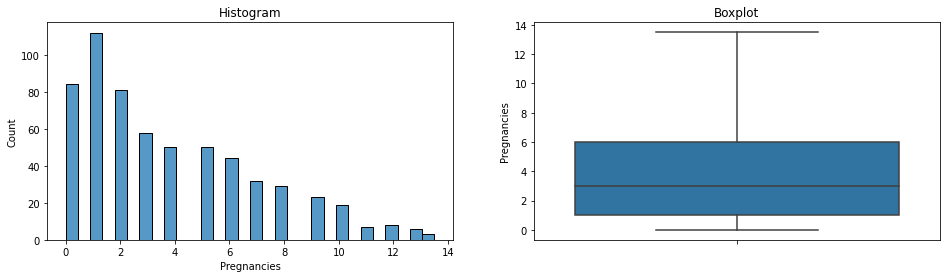


Glucose - After Handling Outlier Capping

Skewness Value Glucose :  0.3960800776430389


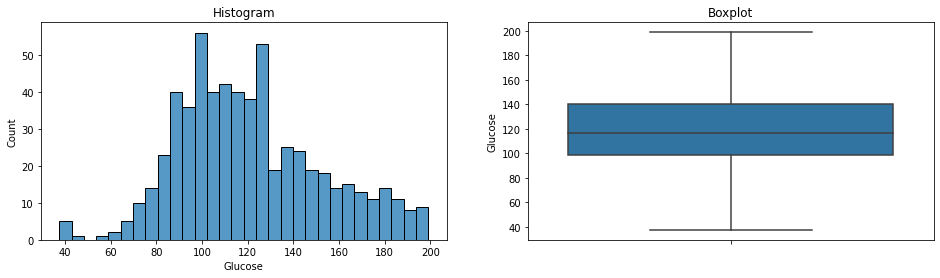


BloodPressure - After Handling Outlier Capping

Skewness Value BloodPressure :  -0.3140777964090464


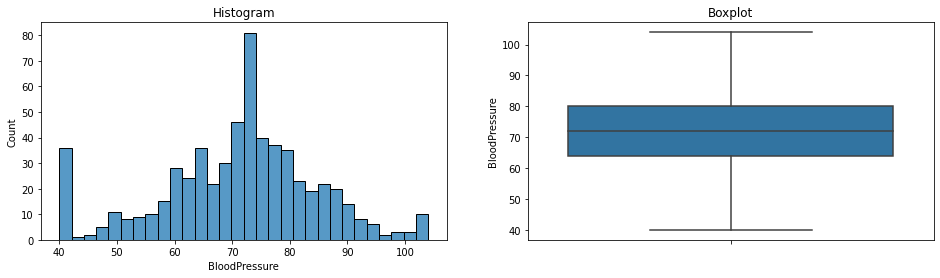


SkinThickness - After Handling Outlier Capping

Skewness Value SkinThickness :  -0.10356118878556303


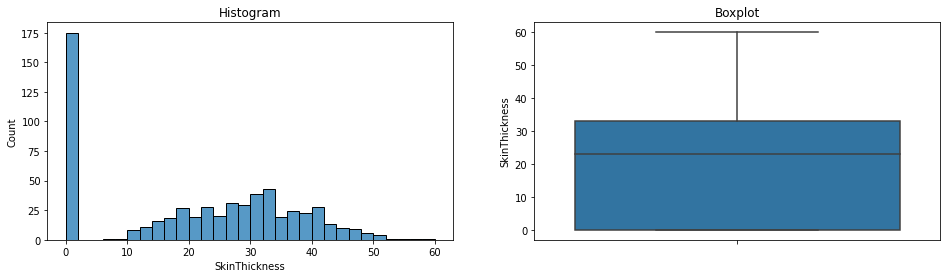


Insulin - After Handling Outlier Capping

Skewness Value Insulin :  1.1527744607916945


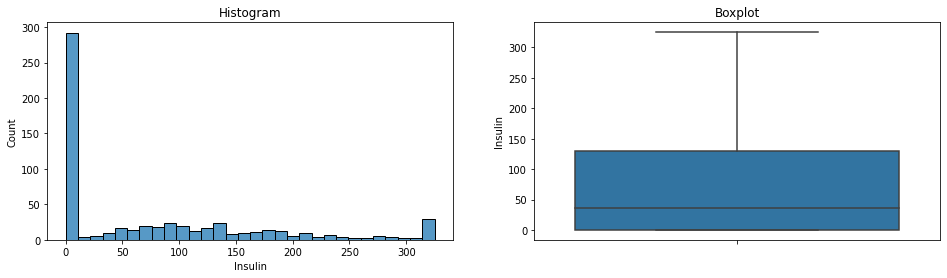


BMI - After Handling Outlier Capping

Skewness Value BMI :  0.09832586210120492


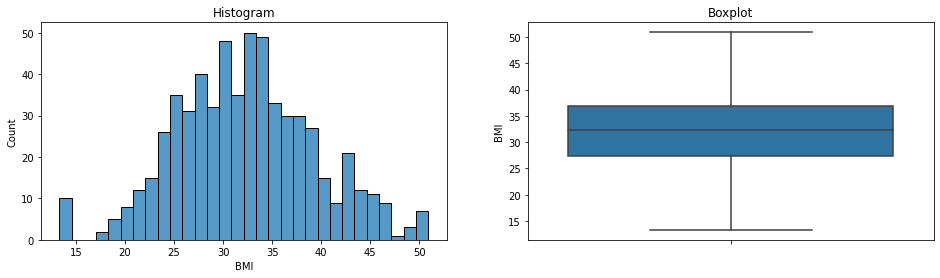


DiabetesPedigreeFunction - After Handling Outlier Capping

Skewness Value DiabetesPedigreeFunction :  1.0174752420293567


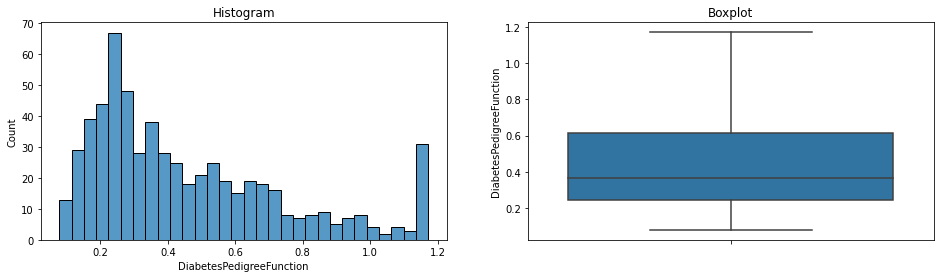


Age - After Handling Outlier Capping

Skewness Value Age :  1.0255021716536776


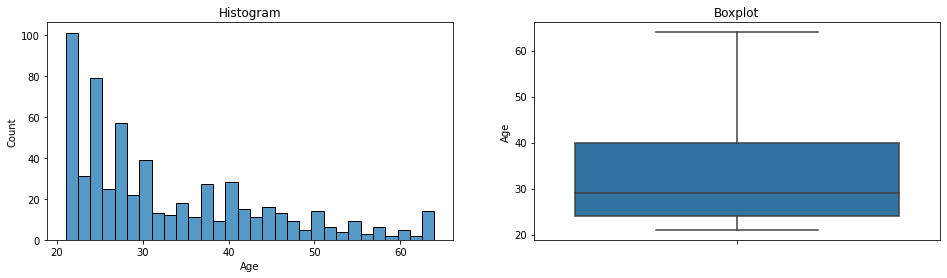

In [ ]:
# Visualization After Handling Outlier
print('\nPregnancies - After Handling Outlier Capping')
print('\nSkewness Value Pregnancies : ', X_trainn['Pregnancies'].skew())
diagnostic_plots(X_trainn, 'Pregnancies')

print('\nGlucose - After Handling Outlier Capping')
print('\nSkewness Value Glucose : ', X_trainn['Glucose'].skew())
diagnostic_plots(X_trainn, 'Glucose')

print('\nBloodPressure - After Handling Outlier Capping')
print('\nSkewness Value BloodPressure : ', X_trainn['BloodPressure'].skew())
diagnostic_plots(X_trainn, 'BloodPressure')

print('\nSkinThickness - After Handling Outlier Capping')
print('\nSkewness Value SkinThickness : ', X_trainn['SkinThickness'].skew())
diagnostic_plots(X_trainn, 'SkinThickness')

print('\nInsulin - After Handling Outlier Capping')
print('\nSkewness Value Insulin : ', X_trainn['Insulin'].skew())
diagnostic_plots(X_trainn, 'Insulin')


print('\nBMI - After Handling Outlier Capping')
print('\nSkewness Value BMI : ', X_trainn['BMI'].skew())
diagnostic_plots(X_trainn, 'BMI')

print('\nDiabetesPedigreeFunction - After Handling Outlier Capping')
print('\nSkewness Value DiabetesPedigreeFunction : ', X_trainn['DiabetesPedigreeFunction'].skew())
diagnostic_plots(X_trainn, 'DiabetesPedigreeFunction')

print('\nAge - After Handling Outlier Capping')
print('\nSkewness Value Age : ', X_trainn['Age'].skew())
diagnostic_plots(X_trainn, 'Age')

Visualization of histogram for normal distribution and boxplot identification of oulier data, based on the picture above that the eight features are normally distributed as before. It is said to be normally distributed when the skewness ratio value is in the range of values of -2 to 2. For oulier data, there is no longer any, because all data from Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age features are moving away from the center The average sample has all been censored to have the same range in the data set. So that there are no more data outliers.

In [ ]:
# Obtained X_trainn that has been done feature engineering
# X_trainn variable is clean from Missing Value and Outlier
X_trainn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1.0,85.0,66.0,29,0.0,26.6,0.351,31.0
532,0.0,127.0,80.0,37,210.0,36.3,0.804,23.0
693,6.0,125.0,78.0,31,0.0,27.6,0.565,49.0
102,2.0,85.0,65.0,0,0.0,39.6,0.930,27.0
710,5.0,97.0,76.0,27,0.0,35.6,0.378,52.0
...,...,...,...,...,...,...,...,...
369,2.0,105.0,58.0,40,94.0,34.9,0.225,25.0
320,2.0,112.0,75.0,32,0.0,35.7,0.148,21.0
527,6.0,91.0,40.0,0,0.0,29.8,0.501,31.0
125,1.0,118.0,58.0,36,94.0,33.3,0.261,23.0


So that a new variable is obtained in the form of X_trainn which is clean from missing values and outliers. For the X_test variable, it is clear of the missing value and the oulier does not need to be done.

## 5f - Numerical and Categorical Column Separation

Quoted from idikuu.com, Numerical data is data that can be measured, then we can process the data in such a way as to be sorted, searched for the average, most appear and so on. While categorical data is a type of data consisting of variables or data from grouping results based on predetermined categories. Based on the definition of the two types of data, that there are differences in the characteristics of the data in each feature, therefore it must be separated.

In [ ]:
# Separate categorical Numerical data and categorical data

numerik_col = X_trainn._get_numeric_data().columns.tolist()
kategorik_col = X_trainn.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns     : ', numerik_col)
print('Categorical Columns : ', kategorik_col)

Numeric Columns     :  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Columns :  []


The separation process is carried out according to the type of data from each feature, it is identified that all feature columns are numeric columns. And no column goes into categorization.

#6 - Model Definition

> This section contains cells to define the model. Explain the reasons for using an algorithm/model, the hyperparameters used, the types of metrics used, and other things related to the model.

## 6a - Model Definition Logistic Regression

In [ ]:
# Model definition for logistic regression algorithm
pipelog = Pipeline([("LogScaler",StandardScaler()), ("LogReg",LogisticRegression())])

In [ ]:
# Finding the value of cross validation logistic regression
kf=KFold(n_splits=5)
scoreslog = cross_val_score(pipelog, X_trainn, y_train, cv=kf)
print("--Logistic Regression--")
print("Cross Validation array           :",scoreslog)
print("Best Cross Validation score      :",scoreslog.mean())
print("Standar Deviasi Cross Validation :",scoreslog.std())

--Logistic Regression--
Cross Validation array           : [0.71311475 0.80991736 0.7768595  0.74380165 0.75206612]
Best Cross Validation score      : 0.7591518764395068
Standar Deviasi Cross Validation : 0.0325451929825488


Model definition Logistics Regression algorithm is an analytical method to describe the relationship between targets that have two or more categories with one or more independent variables on a categorical scale. Logistic regression has a cross validation value of 75.91% and a cross validation standard deviation of 0.0325.

## 6b - Model Definition Support Vector Machine (SVM)

In [ ]:
# Model definition for svm algorithm
pipesvm = Pipeline([("SVMscaler", StandardScaler()), ("svm", SVC())])

In [ ]:
# Find the value of cross validation svm
kf=KFold(n_splits=5)
scoressvm = cross_val_score(pipesvm, X_trainn, y_train, cv=kf)
print("--Support Vector Machine--")
print("Cross Validation array           :",scoressvm)
print("Best Cross Validation score      :",scoressvm.mean())
print("Standar Deviasi Cross Validation :",scoressvm.std())

--Support Vector Machine--
Cross Validation array           : [0.68032787 0.80991736 0.7768595  0.75206612 0.74380165]
Best Cross Validation score      : 0.7525944993903264
Standar Deviasi Cross Validation : 0.04283633854838775


The Support Vector Machine (SVM) definition algorithm method is a method that uses a hypothetical space in the form of linear functions in a feature that has high dimensions and is trained using a learning algorithm based on optimization theory. SVM has a cross validation value of 75.25% and a cross validation standard deviation of 0.0428.

## 6c - Model Definition Decision Tree

In [ ]:
# Model definition for decision tree algorithm
pipeDT = Pipeline([("DTsacler",StandardScaler()), ("DTC",DecisionTreeClassifier(random_state=10))])

In [ ]:
# Finding the value of the cross validation decision tree
kf=KFold(n_splits=5)
scoresDT = cross_val_score(pipeDT, X_trainn, y_train, cv=kf)
print("--Decision Tree--")
print("Cross Validation array           :",scoresDT)
print("Best Cross Validation score      :",scoresDT.mean())
print("Standar Deviasi Cross Validation :",scoresDT.std())

--Decision Tree--
Cross Validation array           : [0.6147541  0.71900826 0.7107438  0.69421488 0.6446281 ]
Best Cross Validation score      : 0.6766698279365939
Standar Deviasi Cross Validation : 0.040302946681491196


Model definition algorithm Decision tree is a method used to assist the decision-making process because the structure of the solution resembles a complete tree with roots, trunks, and branches. Decision Tree has a cross validation value of 67.66% and a cross validation standard deviation of 0.0403.

## 6d - Model Definition Random Forest

In [ ]:
# Model definition for random forest algorithm
pipeRF = Pipeline([("RFsacler",StandardScaler()), ("RFC",RandomForestClassifier(random_state=10))])

In [ ]:
# Finding the value of cross validation random forest
kf=KFold(n_splits=5)
scoresRF = cross_val_score(pipeRF, X_trainn, y_train, cv=kf)
print("--Random Forest--")
print("Cross Validation array           :",scoresRF)
print("Best Cross Validation score      :",scoresRF.mean())
print("Standar Deviasi Cross Validation :",scoresRF.std())

--Random Forest--
Cross Validation array           : [0.63114754 0.76859504 0.7768595  0.76859504 0.75206612]
Best Cross Validation score      : 0.7394526486925891
Standar Deviasi Cross Validation : 0.05474838232517246


Model Definition Random Forest algorithm is a collection of decision trees or decision trees. Random forest is a combination of each tree from the decision tree which is then combined into one model, used for large data sets. Random forest has a cross validation value of 73.94% and a standard deviation of cross validation of 0.0547.

## 6e - Model Definition K-Nearest Neighbor (KNN)

In [ ]:
# Model definition for KNN algorithm
pipeKNN = Pipeline([("KNNscaler",StandardScaler()), ("KNN",KNeighborsClassifier())])

In [ ]:
# Finding the KNN cross validation value
kf=KFold(n_splits=5)
scoresKNN = cross_val_score(pipeKNN, X_trainn, y_train, cv=kf)
print("--K-Nearest Neighbor--")
print("Cross Validation array           :",scoresKNN)
print("Best Cross Validation score      :",scoresKNN.mean())
print("Standar Deviasi Cross Validation :",scoresKNN.std())

--K-Nearest Neighbor--
Cross Validation array           : [0.62295082 0.76033058 0.72727273 0.69421488 0.7107438 ]
Best Cross Validation score      : 0.703102560628641
Standar Deviasi Cross Validation : 0.045652873002095036


Model Definition K-Nearest Neighbor (KNN) algorithm is one of the algorithms that classifies new data using the similarity between new data and a number of data (k) at the closest available location. KNN has a cross validation value of 70.31% and a cross validation standard deviation of 0.0456.

Based on best cross validation that **Logistic Regression algorithm is better than other types of algorithms with a CV of 75.91%**, then the best hyperparameters will be searched for the Logistics Regression algorithm.

#7 - Model Training

> Cells in this section only contain code to train the model and the resulting output. Perform the training process several times with different hyperparameters to see the results obtained. Analyze and narrate these results in the Model Evaluation section.

## 7a - Model Training Logistic Regression

In [ ]:
# Best logistic regression training model without estimator
model_log_reg = pipelog.fit(X_trainn,y_train)

In [ ]:
# Finding the best parameter from a predetermined estimator
param_grid_log = {'LogReg__C': [0.01, 0.1, 1, 10, 100],
                  'LogReg__random_state':[10]}

In [ ]:
# Hyperparameter tuning performs a combination of estimators
gridlog = GridSearchCV(pipelog, param_grid_log, cv=5)
gridlog.fit(X_trainn,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('LogScaler', StandardScaler()),
                                       ('LogReg', LogisticRegression())]),
             param_grid={'LogReg__C': [0.01, 0.1, 1, 10, 100],
                         'LogReg__random_state': [10]})

In [ ]:
# Get the best estimator hyperparameter logistic regression training model
model_log_gridsearchCV = gridlog.best_estimator_
model_log_gridsearchCV

Pipeline(steps=[('LogScaler', StandardScaler()),
                ('LogReg', LogisticRegression(C=1, random_state=10))])

In [ ]:
# Finding the value of cross validation after hyperparameter best estimator
scores = cross_val_score(model_log_gridsearchCV, X_trainn, y_train, cv=5)
print("Cross Validation Score model_log_gridsearchCV array     :",scores)
print("Best Cross Validation Score model_log_gridsearchCV      : {:.2f}".format(gridlog.best_score_))
print("Standar Deviasi Cross Validation model_log_gridsearchCV : {:.2f}".format(gridlog.best_score_.std()))

Cross Validation Score model_log_gridsearchCV array     : [0.72131148 0.79338843 0.75206612 0.7768595  0.76033058]
Best Cross Validation Score model_log_gridsearchCV      : 0.76
Standar Deviasi Cross Validation model_log_gridsearchCV : 0.00


GridseachCV has done the best model, namely logistic regression. The best estimator or logistic regression hyperparameter is C = 1. Where before using the best parameter, it has a CV value of 75.91% and a cross validation standard deviation of 0.0325. Meanwhile, after using the best estimator C = 1, it has a CV value of 76% and a cross validation standard deviation of 0.00. Based on this comparison, that the cross validation value of the best hyperparameter estimation results is better in value when compared to those that do not use estimates, it has a value of 76%, when viewed from the standard deviation value with the best estimate of 0, meaning repeated validation where the training and testing dataset decrease the standard error value.

## 7b - Model Training Support Vector Machine (SVM)

In [ ]:
# The best svm training model without estimator
model_svm = pipesvm.fit(X_trainn,y_train)
model_svm 

Pipeline(steps=[('SVMscaler', StandardScaler()), ('svm', SVC())])

Based on the cross validation value, the SVM algorithm is 75.25%, which is not the best algorithm, so I didn't do the hpyerparameter tuning process but used the default estimator directly.

## 7c - Model Training Decision Tree

In [ ]:
# Decision tree training model with direct determination of estimators
model_DT = pipeDT.fit(X_trainn,y_train)
model_DT

Pipeline(steps=[('DTsacler', StandardScaler()),
                ('DTC', DecisionTreeClassifier(random_state=10))])

Based on the cross validation value of the decision tree algorithm, it is worth 67.66%, which is not the best algorithm, so I didn't do the hpyer parameter tuning process but used the default estimator directly.

## 7d - Model Training Random Forest

In [ ]:
# Random forest training model with direct estimator determination
model_RF = pipeRF.fit(X_trainn,y_train)
model_RF

Pipeline(steps=[('RFsacler', StandardScaler()),
                ('RFC', RandomForestClassifier(random_state=10))])

Based on the value of the cross validation algorithm, random forest is 73.94%, which is not the best algorithm, so I didn't do the hpyerparameter tuning process but used the default estimator directly.

## 7e - Model Training K-Nearest Neighbor (KNN)

In [ ]:
# KNN training model with direct estimator determination
model_KNN = pipeKNN.fit(X_trainn,y_train)
model_KNN

Pipeline(steps=[('KNNscaler', StandardScaler()),
                ('KNN', KNeighborsClassifier())])

Based on the cross validation value of the K-Nearest Neighbor algorithm, it is 70.31%, which is not the best algorithm, so I didn't do the hpyerparameter tuning process but used the default estimator directly.

#8 - Model Evaluation

> In this section, an evaluation of the model is carried out which should show how the model performs based on the selected metrics. This should be demonstrated by visualizing the performance trend and/or model error rate. Perform analysis related to the results on the model and write down the results of the analysis.

## 8a - Model Evaluation Logistic Regression

In [ ]:
# Performa Accuracy Model Logistic Regression
y_pred_train_log = model_log_reg.predict(X_trainn)
y_pred_test_log = model_log_reg.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_log))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_log))

accuracy score train :  0.7722772277227723
accuracy score test :  0.7894736842105263


In [ ]:
# Performa Accuracy Model Logistic Regression Best Estimator hasil GridsearchCV
y_pred_train_log_gridsearchCV = model_log_gridsearchCV.predict(X_trainn)
y_pred_test_log_gridsearchCV = model_log_gridsearchCV.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_log_gridsearchCV))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_log_gridsearchCV))

accuracy score train :  0.7722772277227723
accuracy score test :  0.7894736842105263


The accuracy or accuracy of the logistic regression model without the best estimator has a training value of 77.22% and a testing value of 78.94%, meaning that it is still categorized as goodfit, because the range of values is not much different. While the accuracy or accuracy of the logistic regression model using the best estimator C = 1, has a training value of 77.22% and testing of 78.94%, meaning that it is still categorized as goodfit, where this logistic regression model will be able to predict the diagnostics of diabetes in Indian descent. Based on the difference in the accuracy of the model without the best estimator and the accuracy model using the best estimator, there is no significant difference, in fact the accuracy model has the same value. Indicates that without the search for the best estimator, the model is already quite good at predicting the diagnostics of being diabetic or healthy.

confusion matrix Decision Tree Train Set


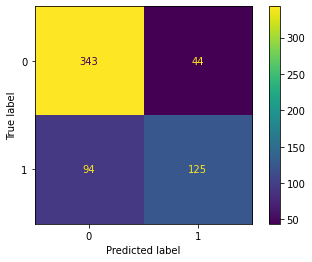

                                           
confusion matrix Decision Tree Test Set


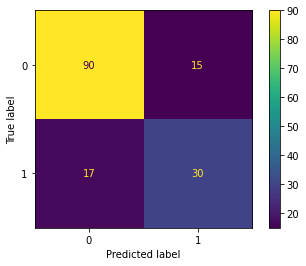

In [ ]:
# Confusion Matrix table with 4 different combinations of predicted values and actual values of the Best Estimator Logistics Regression model GridsearchCV results
print('confusion matrix Decision Tree Train Set')
log = confusion_matrix(y_train,y_pred_train_log_gridsearchCV, labels=model_log_gridsearchCV.classes_)
displog = ConfusionMatrixDisplay(confusion_matrix=log,display_labels=model_log_gridsearchCV.classes_)
displog.plot()
plt.show()
print('                                           ')
print('confusion matrix Decision Tree Test Set')
log2 = confusion_matrix(y_test,y_pred_test_log_gridsearchCV, labels=model_log_gridsearchCV.classes_)
displog2 = ConfusionMatrixDisplay(confusion_matrix=log2,display_labels=model_log_gridsearchCV.classes_)
displog2.plot()
plt.show()

Confusion Matrix y_train. The value of 343 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 44 is the number of data on patients with diabetes entering class 1, but the fact is that the actual observation data is in the wrong category but detected correctly. The value of 94 is the number of data on healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected wrong. The value of 125 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

Confusion Matrix y_test. The value of 90 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 15 is the number of data on patients with diabetes entering class 1, but the fact is that the actual observation data is in the wrong category but detected correctly. The value of 17 is the number of data on healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected wrong. The value of 30 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

In [ ]:
# classification model to predict opportunities that occur using the best estimator of the Logistics Regression Model
print('classification report Logistic Regression Best Estimator Train Set')
print(classification_report(y_train,y_pred_train_log_gridsearchCV))
print('                                  ')
print('classification report Logistic Regression Best Estimator Test Set')
print(classification_report(y_test,y_pred_test_log_gridsearchCV))

classification report Logistic Regression Best Estimator Train Set
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       387
           1       0.74      0.57      0.64       219

    accuracy                           0.77       606
   macro avg       0.76      0.73      0.74       606
weighted avg       0.77      0.77      0.76       606

                                  
classification report Logistic Regression Best Estimator Test Set
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.67      0.64      0.65        47

    accuracy                           0.79       152
   macro avg       0.75      0.75      0.75       152
weighted avg       0.79      0.79      0.79       152



classification report y_train logistic regression method for diagnosing diabetes of Indian origin, where the patient does not have diabetes or is living healthy (Class 0) or diabetic patient (Class 1). Recall 0 the comparison of patients living healthy without diabetes is 0.89, meaning that patients with Indian pima descent have very normal blood sugar levels of 89%. Recall 1 comparison of patients with diabetes is 0.57, meaning that patients of Indian origin have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 57%. And overall, the y_train classification model has an accuracy of 87% of the total 606 rows of data.

classification report y_test logistic regression method for diagnosing diabetes of pima indians, where the patient does not suffer from diabetes or lives a healthy life (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living healthy without suffering from diabetes is 0.86, meaning that patients with Indian pima descent have very normal blood sugar levels of 86%. Recall 1 comparison of patients with diabetes is 0.64, meaning that patients with Indian pima have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 64%. And overall, the y_test classification model has an accuracy of 79% of all 152 rows of data.

## 8b - Model Evaluation SVM

In [ ]:
# Performa Accuracy Model SVM
y_pred_train_svm = model_svm.predict(X_trainn)
y_pred_test_svm = model_svm.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_svm))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_svm))

accuracy score train :  0.8316831683168316
accuracy score test :  0.7960526315789473


The accuracy of the train score model is 83.16% and the test accuracy score is 79.60%. This shows that the SVM model is quite good or goodfit, which means that the model does a good job of predicting diabetes diagnostic outcomes in the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age feature data set.

confusion matrix SVM Train Set


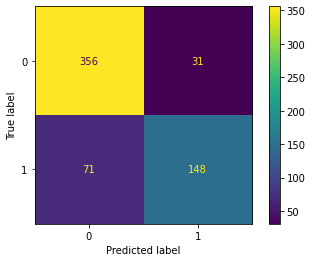

                                           
confusion matrix SVM Test Set


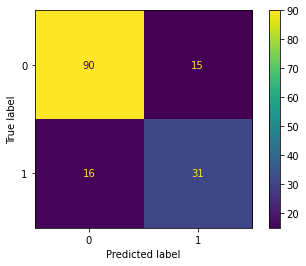

In [ ]:
# Confusion Matrix table with 4 different combinations of predicted values and actual values of the SVM model
print('confusion matrix SVM Train Set')
svm = confusion_matrix(y_train,y_pred_train_svm, labels=model_RF.classes_)
dispdt = ConfusionMatrixDisplay(confusion_matrix=svm,display_labels=model_RF.classes_)
dispdt.plot()
plt.show()
print('                                           ')
print('confusion matrix SVM Test Set')
svm2 = confusion_matrix(y_test,y_pred_test_svm, labels=model_RF.classes_)
dispdt2 = ConfusionMatrixDisplay(confusion_matrix=svm2,display_labels=model_RF.classes_)
dispdt2.plot()
plt.show()

Confusion Matrix y_train. The value of 356 is the number of data predicted by healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 31 is the number of data on patients with diabetes entering class 1 but the fact is that the actual observation data is in the wrong category but detected correctly. The value of 71 is the number of data on healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected wrong. The value of 148 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

Confusion Matrix y_test. The value of 90 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 15 is the number of data on patients with diabetes entering class 1, but the fact is that the actual observation data is in the wrong category but detected correctly. The value of 16 is the number of data on healthy living patients who fall into category 0 but the reality on the observation data is that the value is in the correct category but is detected wrong. The value of 31 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

In [ ]:
# classification model to predict opportunities that occur using the SVM model
print('classification report svm Train Set')
print(classification_report(y_train,y_pred_train_svm))
print('                                  ')
print('classification report svm Test Set')
print(classification_report(y_test,y_pred_test_svm))

classification report svm Train Set
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       387
           1       0.83      0.68      0.74       219

    accuracy                           0.83       606
   macro avg       0.83      0.80      0.81       606
weighted avg       0.83      0.83      0.83       606

                                  
classification report svm Test Set
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.67      0.66      0.67        47

    accuracy                           0.80       152
   macro avg       0.76      0.76      0.76       152
weighted avg       0.79      0.80      0.80       152



classification report y_train SVM method for diagnosing diabetes of pima indians, where the patient does not suffer from diabetes or lives a healthy life (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living a healthy life without suffering from diabetes is 0.92, meaning that patients of Indian pima descent have very normal blood sugar levels of 92%. Recall 1 comparison of patients with diabetes is 0.68, meaning that patients with Indian pima have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 68%. And overall, the y_train classification model has an accuracy of 83% of the total 606 rows of data.

classification report y_test SVM method for diagnosing diabetes of pima indians, where patients do not suffer from diabetes or live healthy lives (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living healthy without suffering from diabetes is 0.86, meaning that patients with Indian pima descent have very normal blood sugar levels of 86%. Recall 1 comparison of patients with diabetes is 0.66, meaning that patients of Indian origin have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 66%. And overall, the y_test classification model has an accuracy of 80% of all 152 rows of data.

## 8c - Model Evaluation Decision Tree

In [ ]:
# Performa Accuracy Model Decision Tree
y_pred_train_DTC = model_DT.predict(X_trainn)
y_pred_test_DTC = model_DT.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_DTC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_DTC))

accuracy score train :  1.0
accuracy score test :  0.6842105263157895


The accuracy of the accuracy score train model is 100% and the accuracy score test is 68.42%. This shows that the Deccision Tree Underfit model, which means that the model is not good at predicting diabetes diagnostic results in the data set features Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age.

confusion matrix Decision Tree Train Set


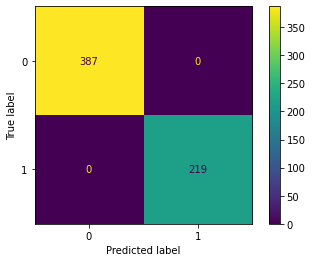

                                           
confusion matrix Decision Tree Test Set


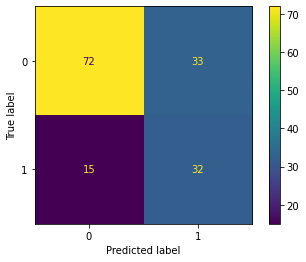

In [ ]:
# Confusion Matrix table with 4 different combinations of predicted values and actual values of the Decision Tree model
print('confusion matrix Decision Tree Train Set')
dt = confusion_matrix(y_train,y_pred_train_DTC, labels=model_DT.classes_)
dispdt = ConfusionMatrixDisplay(confusion_matrix=dt,display_labels=model_DT.classes_)
dispdt.plot()
plt.show()
print('                                           ')
print('confusion matrix Decision Tree Test Set')
dt2 = confusion_matrix(y_test,y_pred_test_DTC, labels=model_DT.classes_)
dispdt2 = ConfusionMatrixDisplay(confusion_matrix=dt2,display_labels=model_DT.classes_)
dispdt2.plot()
plt.show()

Confusion Matrix y_train. The value of 387 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 0 is the number of data on patients with diabetes entering class 1, but the fact is that in the observation data, the value is actually in the wrong category but is detected correctly or there is no patient data. The value of 0 is the number of data of healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected incorrectly or there is no patient data. The value of 219 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

Confusion Matrix y_test. The value of 72 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 33 is the number of data on patients with diabetes entering class 1, but the reality in the observation data is that this value is in the wrong category but detected correctly. The value of 15 is the number of data on healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected wrong. The value of 32 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

In [ ]:
# classification model to predict opportunities that occur using the Decision Tree model
print('classification report Decision Tree Train Set')
print(classification_report(y_train,y_pred_train_DTC))
print('                                  ')
print('classification report Decision Tree Test Set')
print(classification_report(y_test,y_pred_test_DTC))

classification report Decision Tree Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       219

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

                                  
classification report Decision Tree Test Set
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       105
           1       0.49      0.68      0.57        47

    accuracy                           0.68       152
   macro avg       0.66      0.68      0.66       152
weighted avg       0.72      0.68      0.69       152



classification report y_train Decision Tree method for diagnosing diabetes of pima indians, where the patient does not suffer from diabetes or is living a healthy life (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living healthy without diabetes is 1.0, meaning that patients with Indian pima descent have very normal blood sugar levels of 100%. Recall 1 comparison of patients with diabetes is 1.0, meaning that patients of Indian origin have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 100%. And overall, the y_train classification model has 100% accuracy from all 606 rows of data.

classification report y_test decision tree method for diagnosing diabetes of pima indians, where the patient does not suffer from diabetes or lives a healthy life (Class 0) or patients with diabetes (Class 1). Recall 0 the comparison of patients living healthy without suffering from diabetes is 0.69, meaning that patients with Indian pima descent have very normal blood sugar levels of 69%. Recall 1 comparison of patients with diabetes is 0.68, meaning that patients with Indian pima have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 68%. And overall, the y_test classification model has an accuracy of 68% of the 152 rows of data.

Based on these results, the results of the classification using the decision tree method are less accurate, because 100 patients were detected as healthy and 100% of patients with diabetes. Due to the inappropriate classification, the decision tree model is not appropriate to use.

## 8d - Random Forest

In [ ]:
# Performa Accuracy Model Random Forest
y_pred_train_RFC = model_RF.predict(X_trainn)
y_pred_test_RFC = model_RF.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RFC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RFC))

accuracy score train :  1.0
accuracy score test :  0.8026315789473685


The accuracy of the train score model is 100% and the accuracy test score is 80.26%. This shows that the Random Forest Underfit model, which means that the model is not good at predicting the diagnostic results of diabetes in the data set features Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age.

confusion matrix Random Forest Train Set


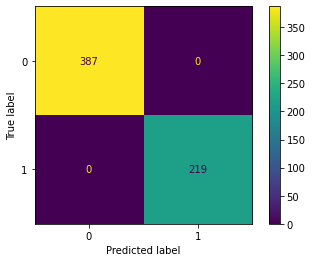

                                           
confusion matrix Random Forest Test Set


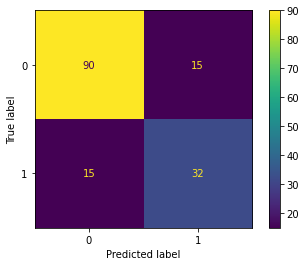

In [ ]:
# Confusion Matrix table with 4 different combinations of predicted values and actual values of the Random Forest model
print('confusion matrix Random Forest Train Set')
rf = confusion_matrix(y_train,y_pred_train_RFC, labels=model_RF.classes_)
disprf = ConfusionMatrixDisplay(confusion_matrix=rf,display_labels=model_RF.classes_)
disprf.plot()
plt.show()
print('                                           ')
print('confusion matrix Random Forest Test Set')
rf2 = confusion_matrix(y_test,y_pred_test_RFC, labels=model_RF.classes_)
disprf2 = ConfusionMatrixDisplay(confusion_matrix=rf2,display_labels=model_RF.classes_)
disprf2.plot()
plt.show()

Confusion Matrix y_train. The value of 387 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 0 is the number of data on patients with diabetes entering class 1, but the fact is that in the observation data, the value is actually in the wrong category but is detected correctly or there is no patient data. The value of 0 is the number of data of healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected incorrectly or there is no patient data. The value of 219 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

Confusion Matrix y_test. The value of 90 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 15 is the number of data on patients with diabetes entering class 1, but the fact is that the actual observation data is in the wrong category but detected correctly. The value of 15 is the number of data on healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected wrong. The value of 32 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

In [ ]:
# classification model to predict opportunities that occur using the Random Forest model
print('classification report Random Forest Train Set')
print(classification_report(y_train,y_pred_train_RFC))
print('                                  ')
print('classification report Random Forest Test Set')
print(classification_report(y_test,y_pred_test_RFC))

classification report Random Forest Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       219

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

                                  
classification report Random Forest Test Set
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.68      0.68      0.68        47

    accuracy                           0.80       152
   macro avg       0.77      0.77      0.77       152
weighted avg       0.80      0.80      0.80       152



classification report y_train Random Forest method for diagnosing diabetes of pima indians, where patients do not suffer from diabetes or live healthy lives (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living healthy without diabetes is 1.0, meaning that patients with Indian pima descent have very normal blood sugar levels of 100%. Recall 1 comparison of patients with diabetes is 1.0, meaning that patients of Indian origin have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 100%. And overall, the y_train classification model has 100% accuracy from all 606 rows of data.

classification report y_test Random Forest method for diagnosing diabetes of pima indians, where the patient does not suffer from diabetes or lives a healthy life (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living healthy without suffering from diabetes is 0.86, meaning that patients with Indian pima descent have very normal blood sugar levels of 86%. Recall 1 comparison of patients with diabetes is 0.68, meaning that patients with Indian pima have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 68%. And overall, the y_test classification model has an accuracy of 80% of all 152 rows of data.

Based on these results, the results of the classification using the Random Forest method are less accurate, because 100 patients were detected as healthy and 100% of patients with diabetes. Due to the inappropriate classification, the decision tree model is not appropriate to use.

## 8e - Model Evaluation K-Nearest Neighbor (KNN)

In [ ]:
# Performa Accuracy Model KNN
y_pred_train_KNN = model_KNN.predict(X_trainn)
y_pred_test_KNN = model_KNN.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_KNN))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_KNN))

accuracy score train :  0.8184818481848185
accuracy score test :  0.7631578947368421


The accuracy of the train score model is 81.84% and the test accuracy score is 76.31%. This shows that the KNN model is quite good or goodfit, which means that the model does a good job of predicting the diagnostic outcome of diabetes in the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree Function and Age feature data set.

confusion matrix K-Nearest Neighbor Train Set


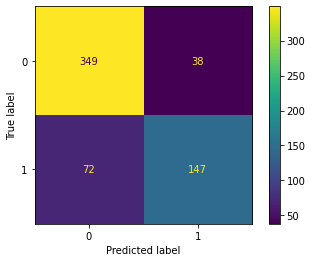

                                           
confusion matrix K-Nearest Neighbor Test Set


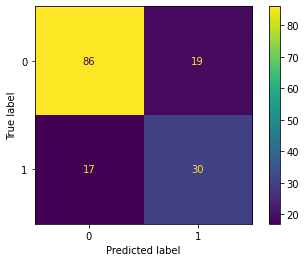

In [ ]:
# Confusion Matrix table with 4 different combinations of predicted values and actual values of the KNN model
print('confusion matrix K-Nearest Neighbor Train Set')
knn = confusion_matrix(y_train,y_pred_train_KNN, labels=model_KNN.classes_)
dispknn = ConfusionMatrixDisplay(confusion_matrix=knn,display_labels=model_KNN.classes_)
dispknn.plot()
plt.show()
print('                                           ')
print('confusion matrix K-Nearest Neighbor Test Set')
knn2 = confusion_matrix(y_test,y_pred_test_KNN, labels=model_KNN.classes_)
dispknn2 = ConfusionMatrixDisplay(confusion_matrix=knn2,display_labels=model_KNN.classes_)
dispknn2.plot()
plt.show()

Confusion Matrix y_train. The value of 349 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 38 is the number of data on patients with diabetes who enter class 1 but the fact is in the actual observation data that the value is in the wrong category but detected correctly. The value of 72 is the number of data on healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected wrong. The value of 147 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

Confusion Matrix y_test. The value of 86 is the number of predictive data of healthy living patients who enter class 0 and the fact that the actual observation data of healthy living patients is in the correct category. The value of 19 is the number of data on patients with diabetes entering class 1 but the fact is that the actual observation data is in the wrong category but detected correctly. The value of 17 is the number of data on healthy living patients who fall into category 0 but the reality in the observation data is that the value is in the correct category but is detected wrong. The value of 30 is the number of patients with diabetes who enter class 1 and the fact that in the observation data is actually the true or false category of having diabetes.

In [ ]:
# classification model to predict opportunities that occur using the KNN model
print('classification report K-Nearest Neighbor Train Set')
print(classification_report(y_train,y_pred_train_KNN))
print('                                  ')
print('classification report K-Nearest Neighbor Test Set')
print(classification_report(y_test,y_pred_test_KNN))

classification report K-Nearest Neighbor Train Set
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       387
           1       0.79      0.67      0.73       219

    accuracy                           0.82       606
   macro avg       0.81      0.79      0.80       606
weighted avg       0.82      0.82      0.81       606

                                  
classification report K-Nearest Neighbor Test Set
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       105
           1       0.61      0.64      0.62        47

    accuracy                           0.76       152
   macro avg       0.72      0.73      0.73       152
weighted avg       0.77      0.76      0.76       152



classification report y_train KNN method for diagnosing diabetes of pima indians, where the patient does not suffer from diabetes or lives a healthy life (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living healthy without diabetes is 0.90, meaning that patients with Indian pima descent have very normal blood sugar levels of 90%. Recall 1 comparison of patients with diabetes is 0.67, meaning that patients of Indian origin have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 67%. And overall, the y_train classification model has an accuracy of 82% of the total 606 rows of data.

classification report y_test KNN method for diagnosing diabetes of pima indians, where the patient does not suffer from diabetes or lives a healthy life (Class 0) or patients with diabetes (Class 1). Recall 0 comparison of patients living healthy without diabetes is 0.82, meaning that patients with Indian pima descent have very normal blood sugar levels of 82%. Recall 1 comparison of patients with diabetes is 0.64, meaning that patients with Indian pima have body problems in the form of chronic metabolic disorders with multiple etiologies, which are characterized by high blood sugar levels of 64%. And overall, the y_test classification model has an accuracy of 76% of all 152 rows of data.

## 8f - Save the best models

In [ ]:
# models for deployment
import pickle
with open ('model_logreg.pkl','wb') as model_file:
  pickle.dump(model_log_gridsearchCV, model_file)

#9 - Model Inference

Modeling Inference is the process of making predictions using a trained model. To prove whether the model has worked well and is appropriate.

## 9a - Loading Data Inference

In [ ]:
# Before the inference we first show the inference data at the beginning
datainfernce

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,154,72,29,126,31.3,0.338,37,0
1,2,112,86,42,160,38.4,0.246,28,0
2,1,135,54,0,0,26.7,0.687,62,0
3,3,107,62,13,48,22.9,0.678,23,1
4,3,102,74,0,0,29.5,0.121,32,0
5,1,97,66,15,140,23.2,0.487,22,0
6,0,104,64,23,116,27.8,0.454,23,0
7,7,114,66,0,0,32.8,0.258,42,1
8,4,83,86,19,0,29.3,0.317,34,0
9,0,137,84,27,0,27.3,0.231,59,0


In [ ]:
datainferncefin=datainfernce[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
datainferncefin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,154,72,29,126,31.3,0.338,37
1,2,112,86,42,160,38.4,0.246,28
2,1,135,54,0,0,26.7,0.687,62
3,3,107,62,13,48,22.9,0.678,23
4,3,102,74,0,0,29.5,0.121,32
5,1,97,66,15,140,23.2,0.487,22
6,0,104,64,23,116,27.8,0.454,23
7,7,114,66,0,0,32.8,0.258,42
8,4,83,86,19,0,29.3,0.317,34
9,0,137,84,27,0,27.3,0.231,59


## 9b - Model Inference Logistic Regression

In [ ]:
# Predict using Linear Regression for data inference
y_pred_inf_log_reg = model_log_reg.predict(datainferncefin)
y_pred_inf_log_reg_fin = pd.DataFrame(y_pred_inf_log_reg, columns=['Pred-LOGREG-Diabetes'])
y_pred_inf_log_reg_fin 

,Pred-LOGREG-Diabetes
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# Predict using Linear Regression best estimator for data inference
y_pred_inf_log_gridsearchCV = model_log_gridsearchCV.predict(datainferncefin)
y_pred_inf_log_gridsearchCV_fin = pd.DataFrame(y_pred_inf_log_gridsearchCV, columns=['Pred-log-BestEstimator-Diabetes'])
y_pred_inf_log_gridsearchCV_fin 

,Pred-log-BestEstimator-Diabetes
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 9c - Model Inference SVM

In [ ]:
# Predict using SVM for data inference
y_pred_inf_svm = model_svm.predict(datainferncefin)
y_pred_inf_svm_fin = pd.DataFrame(y_pred_inf_svm, columns=['Pred-SVM-Diabetes'])
y_pred_inf_svm_fin 

,Pred-SVM-Diabetes
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


## 9d - Model Inference Decision Tree

In [ ]:
# Predict using Decision Tree for data inference
y_pred_inf_DT = model_DT.predict(datainferncefin)
y_pred_inf_DTC_fin = pd.DataFrame(y_pred_inf_DT, columns=['Pred-DT-Diabetes'])
y_pred_inf_DTC_fin 

,Pred-DT-Diabetes
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,1


## 9e - Model Inference Random Forest

In [ ]:
# Prediction using Random Forest for data inference
y_pred_inf_RF = model_RF.predict(datainferncefin)
y_pred_inf_RFC_fin = pd.DataFrame(y_pred_inf_RF, columns=['Pred-RF-Diabetes'])
y_pred_inf_RFC_fin 

,Pred-RF-Diabetes
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,1


## 9f - Model Inference KKN

In [ ]:
# Prediction using Random Forest for data inference
y_pred_inf_KNN = model_KNN.predict(datainferncefin)
y_pred_inf_KNN_fin = pd.DataFrame(y_pred_inf_KNN, columns=['Pred-KNN-Diabetes'])
y_pred_inf_KNN_fin 

,Pred-KNN-Diabetes
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,1


## 9g - Model Inference Algorithm

In [ ]:
# Merge/merge predictive inference data
pd.concat([datainfernce,y_pred_inf_log_reg_fin,y_pred_inf_log_gridsearchCV_fin,y_pred_inf_svm_fin,y_pred_inf_DTC_fin,y_pred_inf_RFC_fin,y_pred_inf_KNN_fin], axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred-LOGREG-Diabetes,Pred-log-BestEstimator-Diabetes,Pred-SVM-Diabetes,Pred-DT-Diabetes,Pred-RF-Diabetes,Pred-KNN-Diabetes
0,4,154,72,29,126,31.3,0.338,37,0,1,1,1,0,1,1
1,2,112,86,42,160,38.4,0.246,28,0,0,0,0,0,0,0
2,1,135,54,0,0,26.7,0.687,62,0,1,1,0,1,1,0
3,3,107,62,13,48,22.9,0.678,23,1,0,0,0,0,0,0
4,3,102,74,0,0,29.5,0.121,32,0,0,0,0,0,0,0
5,1,97,66,15,140,23.2,0.487,22,0,0,0,0,0,0,0
6,0,104,64,23,116,27.8,0.454,23,0,0,0,0,0,0,0
7,7,114,66,0,0,32.8,0.258,42,1,0,0,0,1,1,1
8,4,83,86,19,0,29.3,0.317,34,0,0,0,0,0,0,0
9,0,137,84,27,0,27.3,0.231,59,0,0,0,1,1,1,1


#10 - Conclusion Drawing

> In this last section, it must contain conclusions that reflect the results obtained with the objectives that have been written in the introduction section.

Diagnostically predicting whether a patient has diabetes (Grade 1) or not indicates a person with diabetes (Grade) 0, based on certain diagnostic measures as features included in the data set. The Pima Indians Diabetes dataset consists of several medical parameters and one target parameter (outcome) of binary values ​​0 and 1. This dataset is mainly for predicting gender. Female at least 21 years old of Pima Indian descent.
The dataset consists of several medical feature variables and one target variable, Outcome. Feature variables include Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age. Based on this, I will analyze the diagnostics of diabetic hereditary pima indians with six methods, namely Logistic Regression, SVM, Decision Tree, Random Forest and KNN.

---
> Exploratory Data Analysis (EDA)

Pie chart visualization shows a class comparison of diabetic diagnostics from patients of Indian origin. Based on the visualization it shows that class 0 is more dominant by 65.1% which means, the patients do not suffer from diabetes or live a healthy life where the blood sugar level of the patient's body is normal. While visualization class 1 is 34.9% less, which means that the patients have diabetes where the blood sugar level of the patient's body is very high. If the number of healthy patients is greater than the number of patients with diabetes, the ratio is very different, namely 6: 4. Based on the diagnostic target of diabetes, in this study I will not perform feature imbalance to equalize the comparison between the target classes, because in the case of health, the patient is always expected live healthy and not affected by any disease, in this case class 0 with healthy living patients is more dominant so it is hoped that all patients are also in good health, and want to analyze the original data without changing the target class.

---
> Evaluation Model Algorithm

1. Based on the results of cross validation in each model, the logistic regression model is the best algorithm, because it has the highest cross validation value of 75.91% compared to other models. So I will look for the best hyperparameters in modeling the diagnostic dataset of diabetic hereditary pima indians, the cross validation value of the gridSearchCV C = 1 results is 76% and the standard deviation is 0 which means repeated validation where the training and testing dataset decreases its standard error value. So I use the logistic regression model for the deployment model.
2. Based on the accuracy score, the accuracy or accuracy of the logistic regression model without the best estimator has a training value of 77.22% and a testing value of 78.94%, meaning that it is still categorized as goodfit, because the range of values ​​is not much different. The accuracy of the SVM model accuracy score train is 83.16% and the accuracy score test is 79.60% and the accuracy of the KNN model accuracy score train is 81.84% and the accuracy score test is 76.31%, meaning that these two models are still categorized as goodfit because the range of values ​​is not much different. While the accuracy of the decision tree model accuracy score train is 100% and the accuracy score test is 68.42% and the accuracy of the random forest model accuracy score train is 100% and the accuracy score test is 80.26%, meaning that these two modes are categorized as underfit because the value ranges are far apart. So, when viewed from the accuracy of the training set and testing set models, the best model is logistic regression because it has almost the same accuracy between the splitting training data.
3. Based on the results of the y_train classification report, the logistic regression method for diagnosing diabetes in Indian hereditary pima has an accuracy of 87% of all 606 rows of data. This can be an evaluation for patients to pay more attention to healthy lifestyles, eating patterns, sleeping patterns, the portion of strength in work so that disturbances in carbohydrate, lipid, and protein metabolism as a result of insulin function insufficiency, can be normal in general. For health workers, the level of use and drug needs of patients can be more based on their determining features, so that patients can recover from their illness.